In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
data = pd.read_csv('medical_aid_claims.csv')
class_counts = data['fraud'].value_counts()
class_percentage = class_counts / len(data) * 100
print("Class percentage before Over_Sampling:")
print(class_percentage)

Class percentage before Over_Sampling:
0    80.3
1    19.7
Name: fraud, dtype: float64


In [3]:
data.head()

,member-name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,fraud
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,09-11-1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1-14-1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,07-03-1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7-31-1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12-28-1992,Accident At Work,46984,8804,1,2,1


In [4]:
y = data['fraud']
data = data.drop(['email','fraud'],axis=1)

data['gender'] = data['gender'].apply(lambda x: 0 if x=='male' else 1)
locations = list(data['location'].unique())
data['location'] = data['location'].apply(lambda x: locations.index(x))
employers = list(data['employer'].unique())
data['employer'] = data['employer'].apply(lambda x: employers.index(x))
relationships = list(data['relationship'].unique())
data['relationship'] = data['relationship'].apply(lambda x: relationships.index(x))
causes = list(data['cause'].unique())
data['cause'] = data['cause'].apply(lambda x: causes.index(x))
data['patient_age'] = (datetime.now().date() - pd.to_datetime(data['patient_dob'], format='%m-%d-%Y').dt.date).dt.days // 365.25
data['patient_age'] = data['patient_age'].astype(int)

In [5]:
data = data.drop(['patient_dob','patient_name','member-name'],axis=1)


X= data.iloc[:]

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_counts = y_resampled.value_counts()
print(class_counts)
class_percentage = class_counts / len(data) * 100
print("Class percentage after Over_Sampling:")
print(class_percentage)

0    5621
1    5621
Name: fraud, dtype: int64
Class percentage after Over_Sampling:
0    80.3
1    80.3
Name: fraud, dtype: float64


In [6]:
x = X_resampled.iloc[:10]
x = x.values.tolist()
x

[[1, 0, 0, 0, 789, 0, 3798, 1541, 2, 4, 25],
 [1, 1, 1, 1, 860, 0, 48905, 8269, 4, 3, 31],
 [1, 2, 2, 2, 374, 1, 39963, 6223, 2, 2, 23],
 [1, 2, 3, 3, 729, 1, 34948, 8832, 6, 3, 44],
 [1, 3, 4, 3, 716, 2, 46984, 8804, 1, 2, 30],
 [1, 0, 5, 4, 160, 0, 37298, 2445, 2, 4, 48],
 [0, 2, 6, 5, 626, 1, 33981, 3715, 4, 1, 21],
 [0, 4, 7, 6, 318, 0, 5071, 541, 1, 3, 50],
 [0, 5, 8, 7, 715, 0, 22943, 8690, 5, 2, 20],
 [0, 6, 9, 2, 887, 2, 27104, 6680, 2, 3, 39]]

In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_resampled= st_x.fit_transform(X_resampled)    

In [8]:
# X_resampled.columns

In [9]:
X_resampled.shape

(11242, 11)

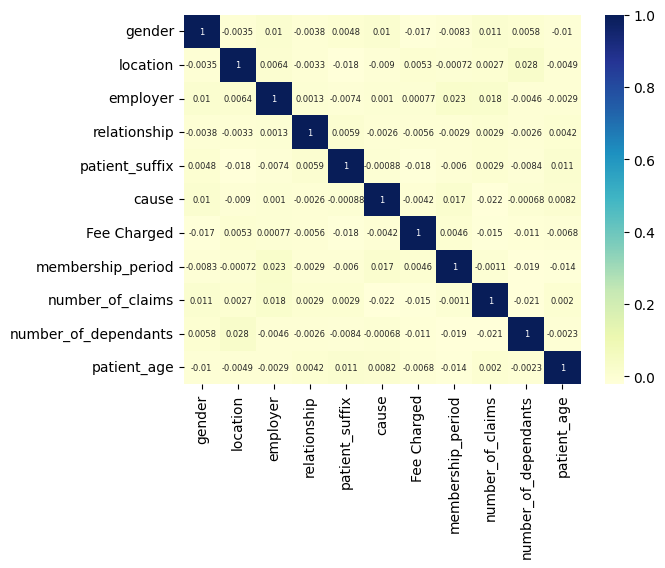

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu",
                 annot_kws={'fontsize': 6})

# Set the font size of the x and y tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

pct = pca.fit_transform(X_resampled)


In [12]:
len(pct)

11242

Eigenvalues
[1.13089833 1.06760487 1.05160943 1.02809523 1.00297067 0.99941637]

eigen vectors
[[ 0.56546303  0.33248459  0.09018727  0.0572593  -0.0606192   0.46605195
  -0.08885342 -0.07550646  0.2368009   0.51624392  0.03514931]
 [-0.20287697  0.38586694  0.17950887 -0.13188195 -0.53164906 -0.05839562
   0.45391181  0.28382253 -0.08527753  0.13346978 -0.40322821]
 [ 0.10995038  0.02762931  0.67283995  0.07777932  0.28247331  0.0066397
  -0.22276398  0.5772858   0.09269029 -0.22901667 -0.06801656]
 [ 0.13231827 -0.05722707 -0.17151796  0.42834947  0.16990149 -0.35001167
   0.18304468 -0.04382077  0.60179904 -0.00890366 -0.46612617]
 [ 0.07671697  0.09507803  0.02687382 -0.69830055 -0.1891552  -0.24454466
  -0.40207229 -0.15797161  0.41992046 -0.15037674 -0.12483398]
 [ 0.21313312 -0.60203189 -0.31068287 -0.28760332 -0.0302082   0.3410824
   0.07245503  0.4106341  -0.03907309  0.04287254 -0.3441043 ]]


Text(0.5, 1.0, 'Scree plot')

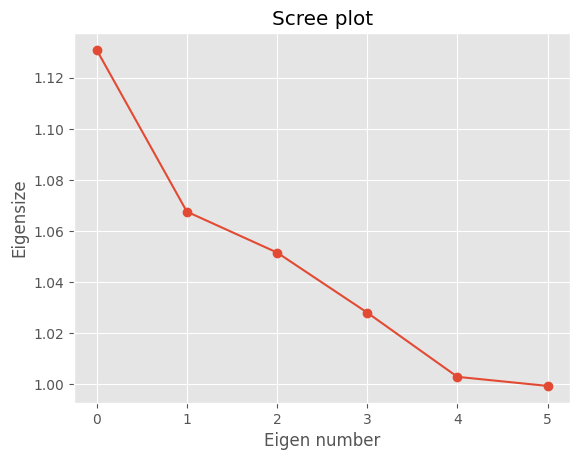

In [13]:
print("Eigenvalues")
print(pca.explained_variance_)
print()
print('eigen vectors')
print(pca.components_)

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(pca.explained_variance_,marker='o')
plt.xlabel("Eigen number")
plt.ylabel('Eigensize')
plt.title("Scree plot")

In [14]:
principal_x = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

y=pd.DataFrame(y_resampled)

print(y)


       fraud
0          0
1          0
2          0
3          0
4          1
...      ...
11237      1
11238      1
11239      1
11240      1
11241      1

[11242 rows x 1 columns]


In [15]:
final= pd.concat([principal_x,y],axis=1)
display(final)

final.rename(columns = {0:'target'}, inplace = True)

print(final.columns)

final.dropna()

,pc1,pc2,pc3,pc4,pc5,pc6,fraud
0,0.063134,-1.810547,-1.696895,0.122485,1.542403,1.650370,0
1,-0.482837,-0.150773,-0.477740,1.263625,0.239637,2.404556,0
2,-0.489141,0.666898,-1.164469,0.193311,0.282553,2.381376,0
3,0.531425,-0.799004,-0.170305,1.130544,0.470898,1.982257,0
4,-0.256257,0.279971,-0.350657,-0.396766,-1.075881,2.656382,1
...,...,...,...,...,...,...,...
11237,-2.184156,-0.875807,-0.047173,-0.786834,1.534466,-0.181774,1
11238,0.897145,-0.168752,-0.359546,-0.373731,2.465450,-0.341565,1
11239,0.405751,1.201823,-1.198643,1.102202,-1.581569,0.875602,1
11240,-1.279810,2.114878,0.246958,0.168807,-0.001696,1.337551,1


Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'fraud'], dtype='object')


,pc1,pc2,pc3,pc4,pc5,pc6,fraud
0,0.063134,-1.810547,-1.696895,0.122485,1.542403,1.650370,0
1,-0.482837,-0.150773,-0.477740,1.263625,0.239637,2.404556,0
2,-0.489141,0.666898,-1.164469,0.193311,0.282553,2.381376,0
3,0.531425,-0.799004,-0.170305,1.130544,0.470898,1.982257,0
4,-0.256257,0.279971,-0.350657,-0.396766,-1.075881,2.656382,1
...,...,...,...,...,...,...,...
11237,-2.184156,-0.875807,-0.047173,-0.786834,1.534466,-0.181774,1
11238,0.897145,-0.168752,-0.359546,-0.373731,2.465450,-0.341565,1
11239,0.405751,1.201823,-1.198643,1.102202,-1.581569,0.875602,1
11240,-1.279810,2.114878,0.246958,0.168807,-0.001696,1.337551,1


In [16]:
final["fraud"].value_counts()

0    5621
1    5621
Name: fraud, dtype: int64

In [17]:
X = final.drop('fraud', axis=1)
y = final['fraud']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [19]:
len(X_train), X_train.shape

(8993, (8993, 6))

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 6)
(2249, 6)
(8993,)
(2249,)


In [21]:
pickle.dump(X_train,open('X_train.pkl', 'wb'))
pickle.dump(y_train,open('y_train.pkl', 'wb'))
pickle.dump(X_test,open('X_test.pkl', 'wb'))
pickle.dump(y_test,open('y_test.pkl', 'wb'))

In [22]:
(X_test.shape)


(2249, 6)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc



RFC = RandomForestClassifier(n_estimators=50,criterion='entropy')
RFC.fit(X_train,y_train)

pickle.dump(RFC, open('rfc.pkl','wb'))


y_pred = RFC.predict(X_test)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cm = confusion_matrix(y_test, y_pred)
print("Random forest classifier score is : ",accuracy_score(y_test,y_pred))
# print("Count of true positive is:", tp)
# print("Count of true negative is:", tn)
# print("Count of false negative is:",fn)
# print("Count of false positive is:",fp)

# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = 2 * precision * recall / (precision + recall)

# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 score: {f1:.2f}")


Random forest classifier score is :  0.681191640729213


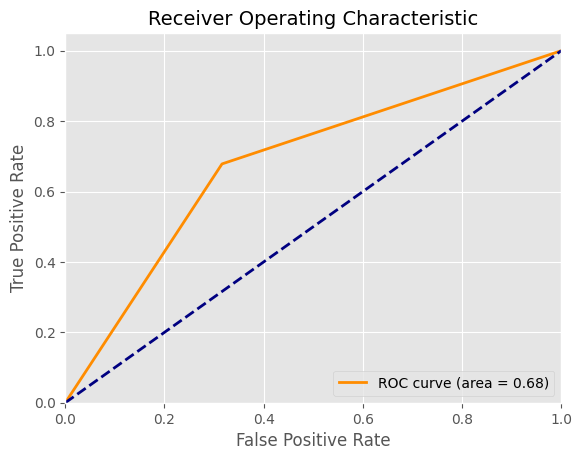

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1117
           1       0.67      0.68      0.68      1132

    accuracy                           0.67      2249
   macro avg       0.67      0.67      0.67      2249
weighted avg       0.67      0.67      0.67      2249



In [24]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Assuming y_test and y_pred are the true and predicted labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver Operating Characteristic',fontsize=14)
plt.legend(loc="lower right",fontsize=10)
plt.show()

print(classification_report(y_test,predictions))

In [25]:
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

pickle.dump(classifier, open('lr.pkl','wb'))


y_pred = classifier.predict(X_test)

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cm= confusion_matrix(y_test, y_pred)
print("Logistic Regression classifier score is : ",accuracy_score(y_test,y_pred))
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = 2 * precision * recall / (precision + recall)

# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 score: {f1:.2f}")

Logistic Regression classifier score is :  0.640284570920409


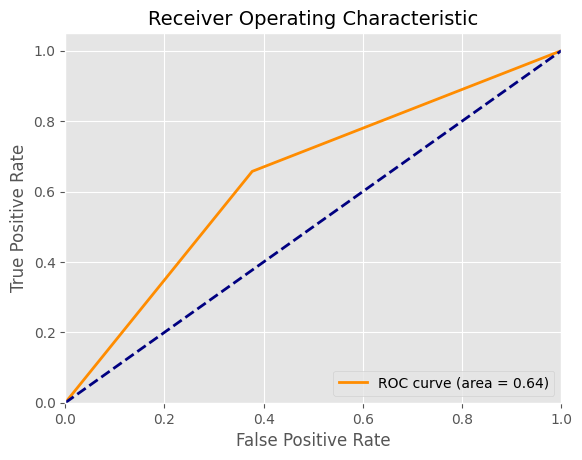

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1117
           1       0.67      0.68      0.68      1132

    accuracy                           0.67      2249
   macro avg       0.67      0.67      0.67      2249
weighted avg       0.67      0.67      0.67      2249



In [26]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
# Assuming y_test and y_pred are the true and predicted labels, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver Operating Characteristic',fontsize=14)
plt.legend(loc="lower right",fontsize=10)
plt.show()

print(classification_report(y_test,predictions))


In [27]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

models = [
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(),
        'hyperparameters': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'hyperparameters': {
            'classifier__max_depth': [10, 50, 100],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'hyperparameters': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [10, 50, 100],
            'classifier__min_samples_split': [2, 5, 10]
        }
    }
]

# Perform grid search cross-validation for each model
for model in models:
    print('Model:', model['name'])
    pipeline = Pipeline([
        ('classifier', model['estimator'])
    ])
    hyperparameters = model['hyperparameters']
    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5)
    grid_search.fit(X_train, y_train)
    print('Best hyperparameters:', grid_search.best_params_)
    print('Test accuracy:', grid_search.score(X_test, y_test))
    '''

"\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.pipeline import Pipeline\n\nmodels = [\n    {\n        'name': 'Logistic Regression',\n        'estimator': LogisticRegression(),\n        'hyperparameters': {\n            'classifier__C': [0.1, 1, 10],\n            'classifier__penalty': ['l1', 'l2']\n        }\n    },\n    {\n        'name': 'Decision Tree',\n        'estimator': DecisionTreeClassifier(),\n        'hyperparameters': {\n            'classifier__max_depth': [10, 50, 100],\n            'classifier__min_samples_split': [2, 5, 10]\n        }\n    },\n    {\n        'name': 'Random Forest',\n        'estimator': RandomForestClassifier(),\n        'hyperparameters': {\n            'classifier__n_estimators': [50, 100, 200],\n            'classifier__max_depth': [10, 50, 100],\n            'classifier__min_samples_split': [2, 5, 10]\n        }\n    }\n]\n\n# Perform grid search cross-validation for each model\nfor model in models:\n    print('Model:', model['n

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
new_data = [[0, 7, 362, 7, 262, 2, 7451, 1956, 2, 2, 20]]
new_df = pd.DataFrame(data=new_data, columns=['gender', 'location', 'employer', 'relationship', 'patient_suffix',
       'cause', 'Fee Charged', 'membership_period', 'number_of_claims',
       'number_of_dependants', 'patient_age'])

# Standardize the new data using the same scaler used for the original data
new_data_scaled = st_x.transform(new_df)

# Apply PCA to the standardized new data
new_data_pca = pca.transform(new_data_scaled)

In [30]:
new_pred = RFC.predict(new_data_pca)
new_pred[0]

0

In [31]:
data.head(10)

,gender,location,employer,relationship,patient_suffix,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,patient_age
0,1,0,0,0,789,0,3798,1541,2,4,25
1,1,1,1,1,860,0,48905,8269,4,3,31
2,1,2,2,2,374,1,39963,6223,2,2,23
3,1,2,3,3,729,1,34948,8832,6,3,44
4,1,3,4,3,716,2,46984,8804,1,2,30
5,1,0,5,4,160,0,37298,2445,2,4,48
6,0,2,6,5,626,1,33981,3715,4,1,21
7,0,4,7,6,318,0,5071,541,1,3,50
8,0,5,8,7,715,0,22943,8690,5,2,20
9,0,6,9,2,887,2,27104,6680,2,3,39


In [32]:
y[:10]

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: fraud, dtype: int64

In [33]:
values1 = data.iloc[:10].values.tolist()
values1

[[1, 0, 0, 0, 789, 0, 3798, 1541, 2, 4, 25],
 [1, 1, 1, 1, 860, 0, 48905, 8269, 4, 3, 31],
 [1, 2, 2, 2, 374, 1, 39963, 6223, 2, 2, 23],
 [1, 2, 3, 3, 729, 1, 34948, 8832, 6, 3, 44],
 [1, 3, 4, 3, 716, 2, 46984, 8804, 1, 2, 30],
 [1, 0, 5, 4, 160, 0, 37298, 2445, 2, 4, 48],
 [0, 2, 6, 5, 626, 1, 33981, 3715, 4, 1, 21],
 [0, 4, 7, 6, 318, 0, 5071, 541, 1, 3, 50],
 [0, 5, 8, 7, 715, 0, 22943, 8690, 5, 2, 20],
 [0, 6, 9, 2, 887, 2, 27104, 6680, 2, 3, 39]]

In [34]:
m = 0
for i in values1:
  m += 1
  new_df = pd.DataFrame(data=[i], columns=['gender', 'location', 'employer', 'relationship', 'patient_suffix',
       'cause', 'Fee Charged', 'membership_period', 'number_of_claims',
       'number_of_dependants', 'patient_age'])

  # Standardize the new data using the same scaler used for the original data
  new_data_scaled = st_x.transform(new_df)

  # Apply PCA to the standardized new data
  new_data_pca = pca.transform(new_data_scaled)
  new_pred = RFC.predict(new_data_pca)
  print(new_pred[0], y[m])


0 0
0 0
0 0
0 1
1 0
0 0
0 0
0 1
1 0
1 0
